In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# LOAD THE DATA 

In [3]:
df = pd.read_csv("/kaggle/input/obesity-levels/ObesityDataSet_raw_and_data_sinthetic.csv")

In [4]:
df.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,Female,1.62,64.0,no,no,2.0,3.0,no,no,2.0,yes,0.0,1.0,Sometimes,Public_Transportation,Normal_Weight
1,21.0,Female,1.52,56.0,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,23.0,Male,1.80,77.0,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,Normal_Weight
3,27.0,Male,1.80,87.0,Frequently,no,3.0,3.0,no,no,2.0,no,2.0,0.0,Sometimes,Walking,Overweight_Level_I
4,22.0,Male,1.78,89.8,Sometimes,no,2.0,1.0,no,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [5]:
new_columns = {'Age':'Age', 'Gender':'Gender', 'Height':'Height', 'Weight':'Weight', 'CALC':'ALC', 'FAVC':'high_calories', 'FCVC':'vegies_meal', 'NCP':'meals',
       'SCC':'calories', 'SMOKE':'SMOKE', 'CH2O':'Water', 'family_history_with_overweight':'family_history_with_overweight', 'FAF':'physical_activity', 'TUE':'Tech_Usage',
       'CAEC':'Fillers', 'MTRANS':'Transport', 'NObeyesdad':'Obesity_level'
}

In [6]:
df.rename(columns=new_columns,inplace=True )

In [7]:
df.head()

,Age,Gender,Height,Weight,ALC,high_calories,vegies_meal,meals,calories,SMOKE,Water,family_history_with_overweight,physical_activity,Tech_Usage,Fillers,Transport,Obesity_level
0,21.0,Female,1.62,64.0,no,no,2.0,3.0,no,no,2.0,yes,0.0,1.0,Sometimes,Public_Transportation,Normal_Weight
1,21.0,Female,1.52,56.0,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,23.0,Male,1.80,77.0,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,Normal_Weight
3,27.0,Male,1.80,87.0,Frequently,no,3.0,3.0,no,no,2.0,no,2.0,0.0,Sometimes,Walking,Overweight_Level_I
4,22.0,Male,1.78,89.8,Sometimes,no,2.0,1.0,no,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [8]:
df.describe()

,Age,Height,Weight,vegies_meal,meals,Water,physical_activity,Tech_Usage
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [9]:
df.describe(include='object')

,Gender,ALC,high_calories,calories,SMOKE,family_history_with_overweight,Fillers,Transport,Obesity_level
count,2111,2111,2111,2111,2111,2111,2111,2111,2111
unique,2,4,2,2,2,2,4,5,7
top,Male,Sometimes,yes,no,no,yes,Sometimes,Public_Transportation,Obesity_Type_I
freq,1068,1401,1866,2015,2067,1726,1765,1580,351


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2111 non-null   float64
 1   Gender                          2111 non-null   object 
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   ALC                             2111 non-null   object 
 5   high_calories                   2111 non-null   object 
 6   vegies_meal                     2111 non-null   float64
 7   meals                           2111 non-null   float64
 8   calories                        2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  Water                           2111 non-null   float64
 11  family_history_with_overweight  2111 non-null   object 
 12  physical_activity               21

In [11]:
df.isnull().sum()

Age                               0
Gender                            0
Height                            0
Weight                            0
ALC                               0
high_calories                     0
vegies_meal                       0
meals                             0
calories                          0
SMOKE                             0
Water                             0
family_history_with_overweight    0
physical_activity                 0
Tech_Usage                        0
Fillers                           0
Transport                         0
Obesity_level                     0
dtype: int64

In [12]:
df.columns

Index(['Age', 'Gender', 'Height', 'Weight', 'ALC', 'high_calories',
       'vegies_meal', 'meals', 'calories', 'SMOKE', 'Water',
       'family_history_with_overweight', 'physical_activity', 'Tech_Usage',
       'Fillers', 'Transport', 'Obesity_level'],
      dtype='object')

In [13]:
numerical_columns = df.select_dtypes(include=['number']).columns
numerical_columns

Index(['Age', 'Height', 'Weight', 'vegies_meal', 'meals', 'Water',
       'physical_activity', 'Tech_Usage'],
      dtype='object')

In [14]:
catgorical_columns = df.select_dtypes(include=['object']).columns
catgorical_columns 

Index(['Gender', 'ALC', 'high_calories', 'calories', 'SMOKE',
       'family_history_with_overweight', 'Fillers', 'Transport',
       'Obesity_level'],
      dtype='object')

In [15]:
df.duplicated().sum()

24

In [16]:
df.loc[df.duplicated()]

,Age,Gender,Height,Weight,ALC,high_calories,vegies_meal,meals,calories,SMOKE,Water,family_history_with_overweight,physical_activity,Tech_Usage,Fillers,Transport,Obesity_level
98,21.0,Female,1.52,42.0,Sometimes,no,3.0,1.0,no,no,1.0,no,0.0,0.0,Frequently,Public_Transportation,Insufficient_Weight
106,25.0,Female,1.57,55.0,Sometimes,yes,2.0,1.0,no,no,2.0,no,2.0,0.0,Sometimes,Public_Transportation,Normal_Weight
174,21.0,Male,1.62,70.0,Sometimes,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,no,Public_Transportation,Overweight_Level_I
179,21.0,Male,1.62,70.0,Sometimes,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,no,Public_Transportation,Overweight_Level_I
184,21.0,Male,1.62,70.0,Sometimes,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,no,Public_Transportation,Overweight_Level_I
209,22.0,Female,1.69,65.0,Sometimes,yes,2.0,3.0,no,no,2.0,yes,1.0,1.0,Sometimes,Public_Transportation,Normal_Weight
309,16.0,Female,1.66,58.0,no,no,2.0,1.0,no,no,1.0,no,0.0,1.0,Sometimes,Walking,Normal_Weight
460,18.0,Female,1.62,55.0,no,yes,2.0,3.0,no,no,1.0,yes,1.0,1.0,Frequently,Public_Transportation,Normal_Weight
467,22.0,Male,1.74,75.0,no,yes,3.0,3.0,no,no,1.0,yes,1.0,0.0,Frequently,Automobile,Normal_Weight
496,18.0,Male,1.72,53.0,Sometimes,yes,2.0,3.0,no,no,2.0,yes,0.0,2.0,Sometimes,Public_Transportation,Insufficient_Weight


In [17]:
df.drop_duplicates(inplace=True)

# CORELATION WITH HEATMAP VIEW

,Age,Height,Weight,vegies_meal,meals,Water,physical_activity,Tech_Usage
Age,1.000000,-0.031748,0.198160,0.013572,-0.055823,-0.044058,-0.148202,-0.302927
Height,-0.031748,1.000000,0.457468,-0.040363,0.227806,0.220487,0.293584,0.041808
Weight,0.198160,0.457468,1.000000,0.216574,0.092149,0.203823,-0.056490,-0.079351
vegies_meal,0.013572,-0.040363,0.216574,1.000000,0.034885,0.081332,0.022003,-0.104128
meals,-0.055823,0.227806,0.092149,0.034885,1.000000,0.075335,0.127816,0.015693
Water,-0.044058,0.220487,0.203823,0.081332,0.075335,1.000000,0.165310,0.020704
physical_activity,-0.148202,0.293584,-0.056490,0.022003,0.127816,0.165310,1.000000,0.058716
Tech_Usage,-0.302927,0.041808,-0.079351,-0.104128,0.015693,0.020704,0.058716,1.000000


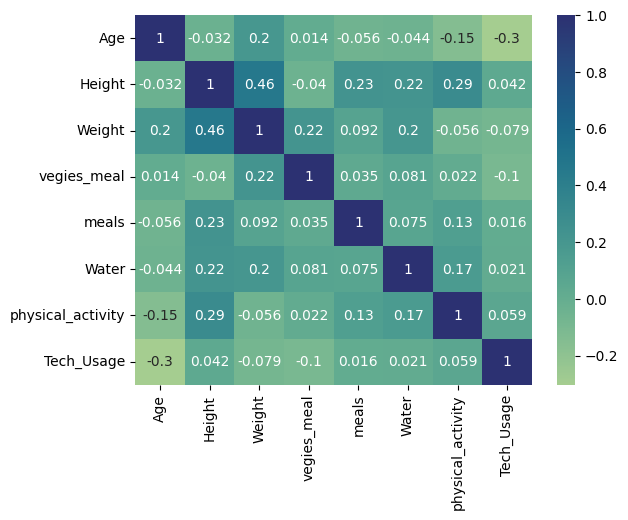

In [19]:
corr=df.corr(numeric_only=True) 
sns.heatmap(corr,cmap='crest',annot=True)
corr

# sns.clustermap(corr, cmap='crest', annot=True)


# EXPLORATORY DATA ANLYSIS

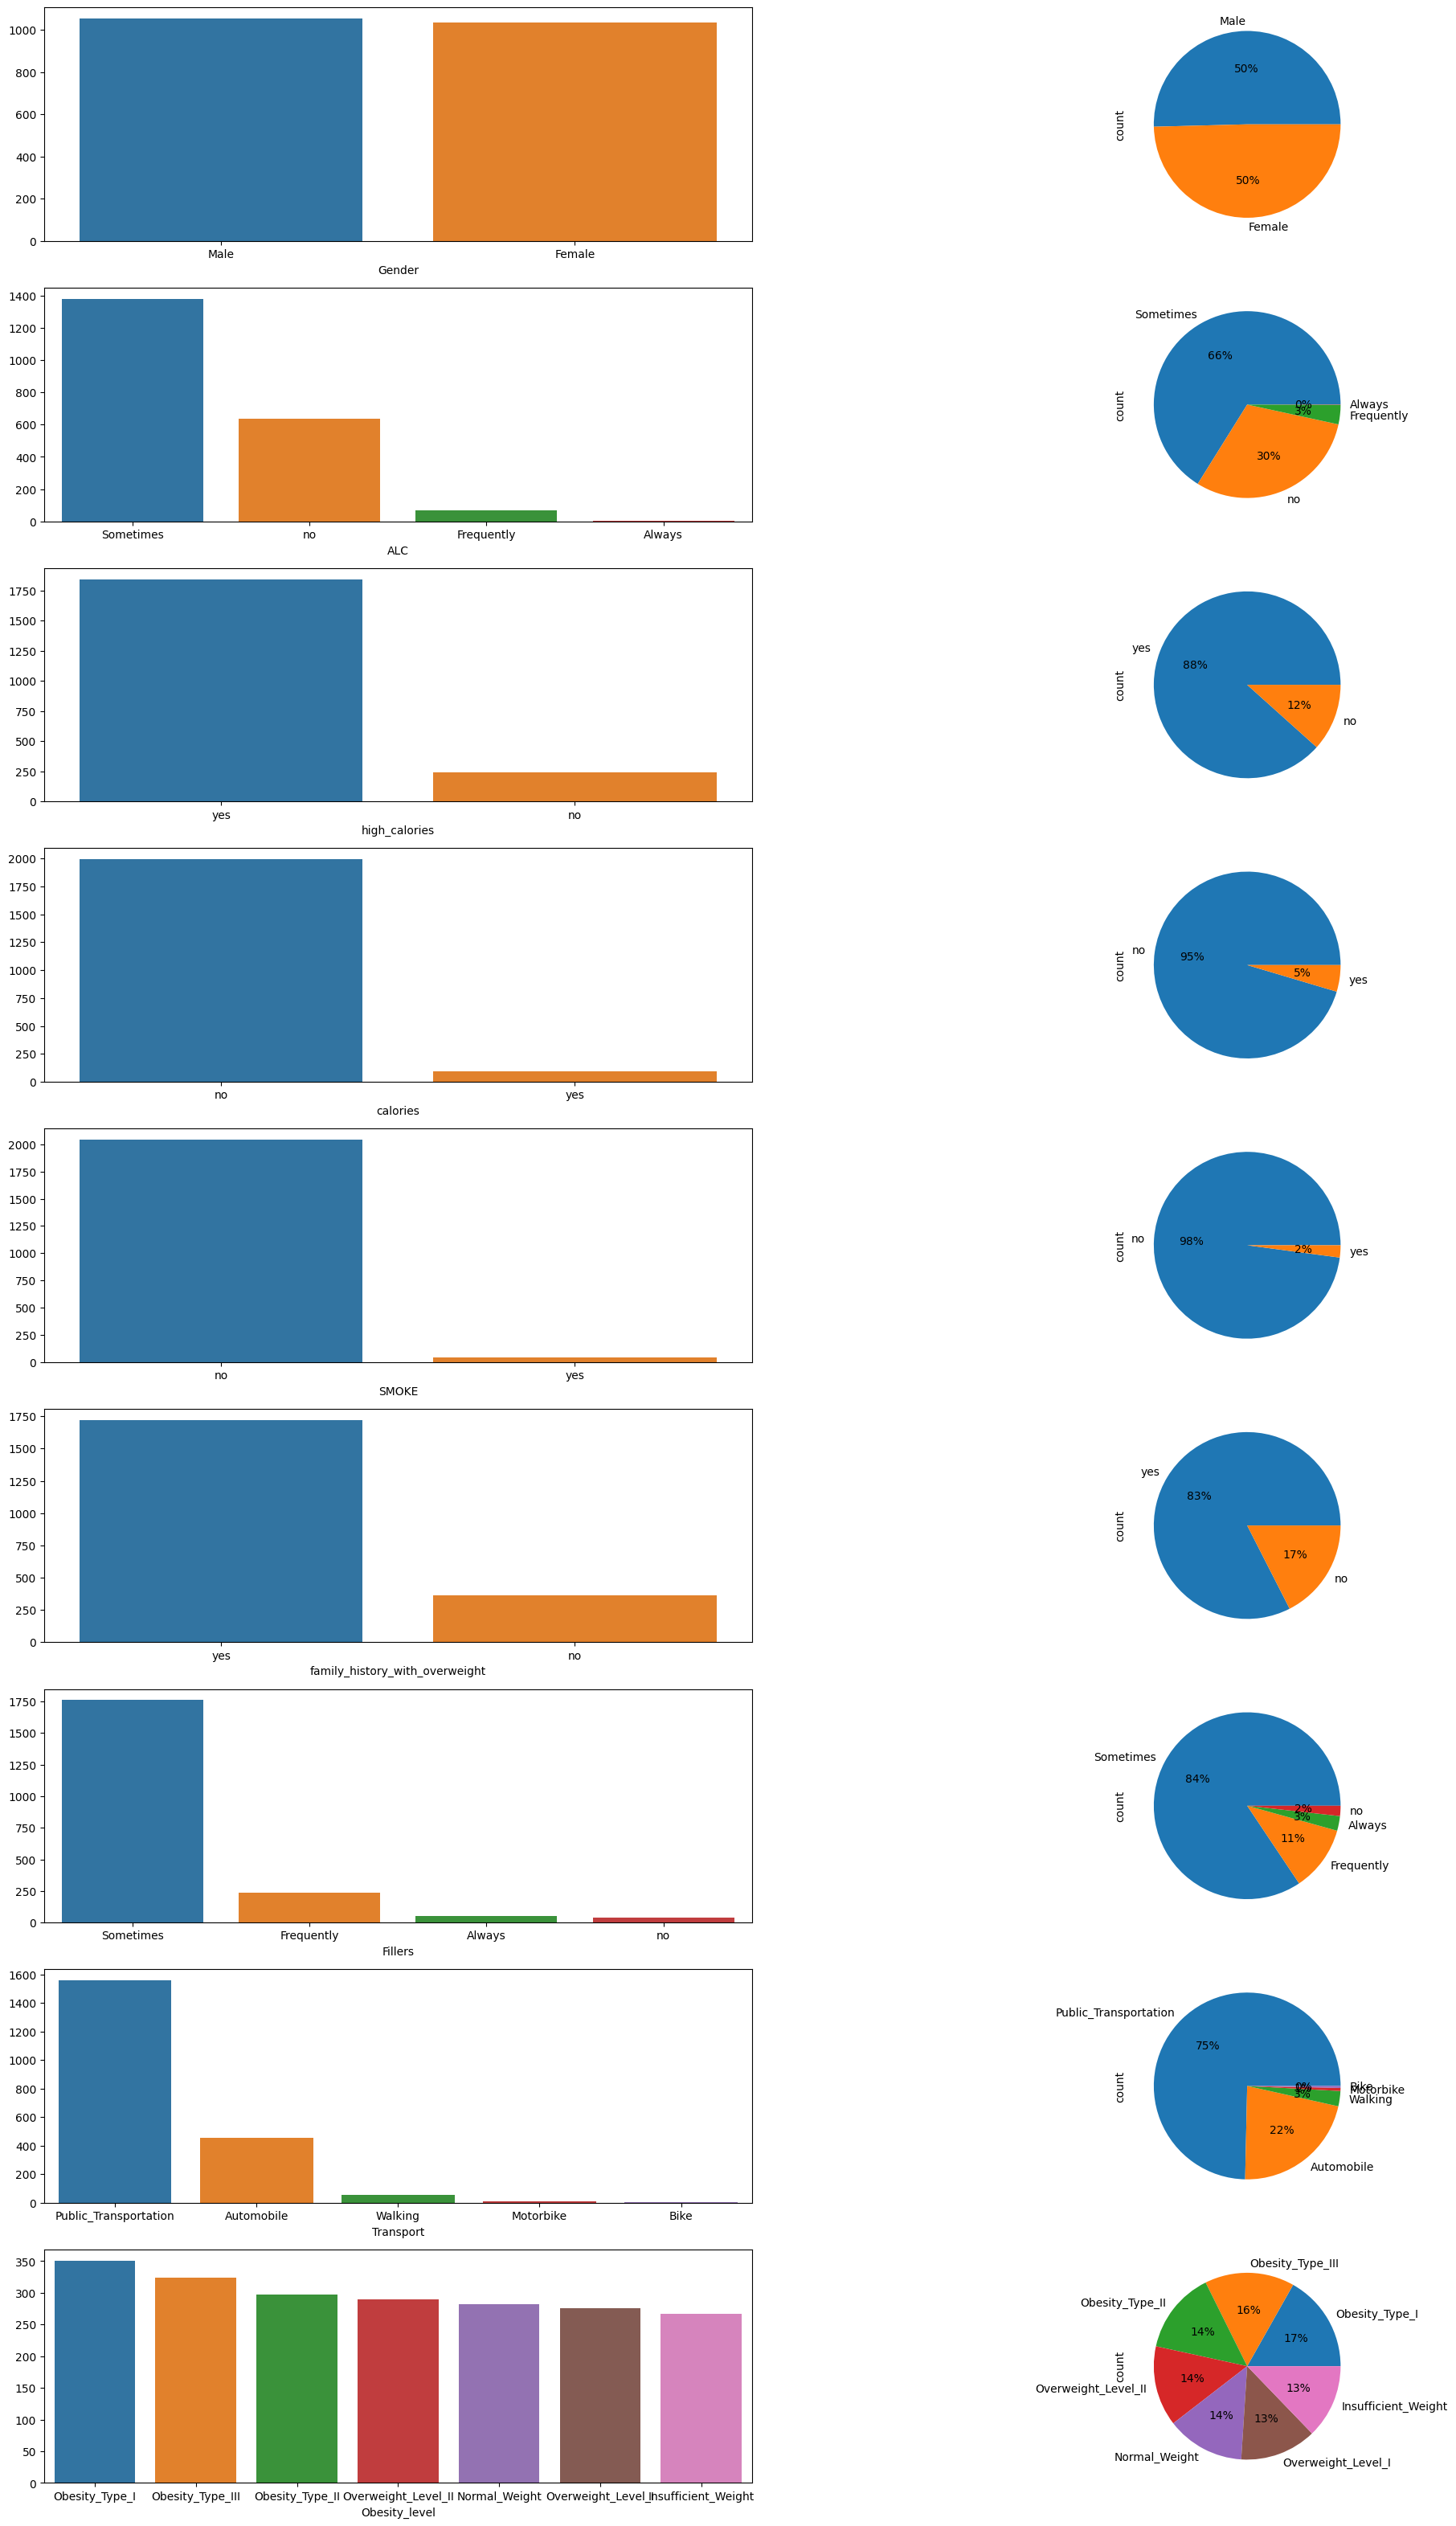

In [20]:
figure,axes=plt.subplots(9,2,figsize=(25,40))
i=0
for col in catgorical_columns:
    index=df[col].value_counts().index
    value=df[col].value_counts().values
    sns.barplot(x=index,y=value,ax=axes[i][0])
    df[col].value_counts().plot(kind='pie',autopct="%0.00f%%",ax=axes[i][1])
    i=i+1

/tmp/ipykernel_33/423965521.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], hist=False, ax=axes[i][0])
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', Tru

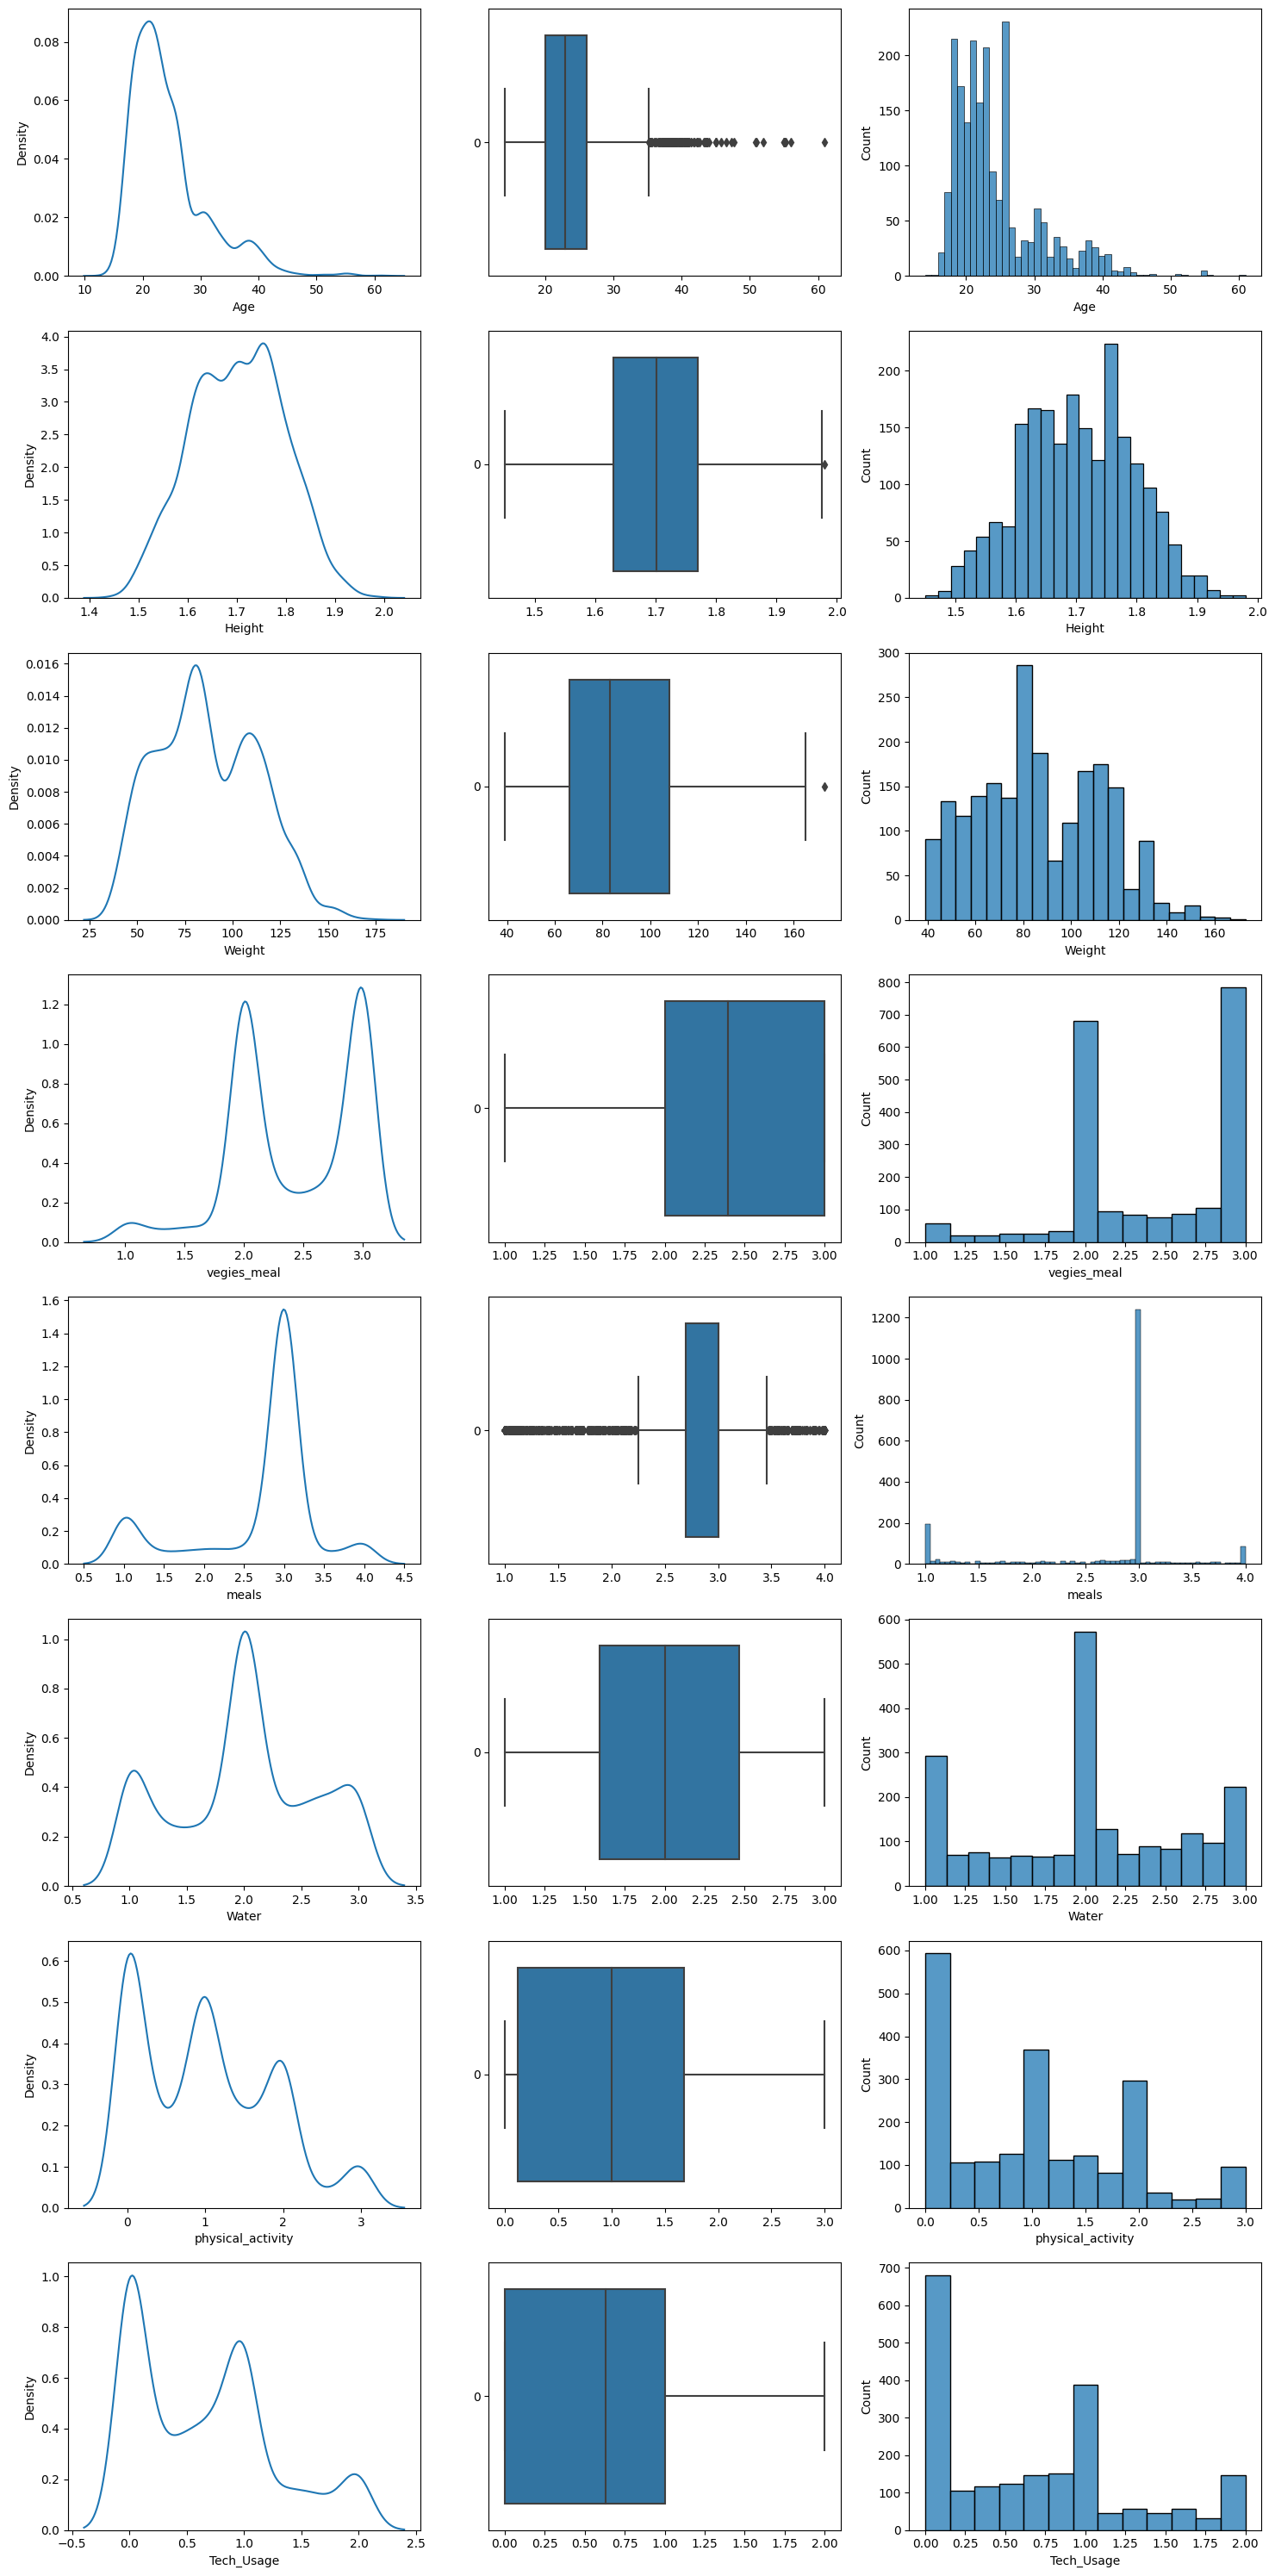

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame and numerical_columns is a list of numerical column names
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

fig, axes = plt.subplots(8, 3, figsize=(15, 30))

for i, col in enumerate(numerical_columns):
    sns.distplot(df[col], hist=False, ax=axes[i][0])
    sns.boxplot(df[col], orient='h', ax=axes[i][1])
    sns.histplot(df[col], ax=axes[i][2])

plt.tight_layout()
plt.show()


# SCALING PROCESS WITH USED OF STANDARD SCALLER METHOD 

In [22]:
from sklearn.preprocessing import StandardScaler
numeric_cols = df.select_dtypes(include=['number'])
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_cols)
num = pd.DataFrame(scaled_data,columns = numeric_cols.columns)

num

,Age,Height,Weight,vegies_meal,meals,Water,physical_activity,Tech_Usage
0,-0.526613,-0.887408,-0.872985,-0.788364,0.390906,-0.007810,-1.186977,0.554211
1,-0.526613,-1.960788,-1.178508,1.082164,0.390906,1.636552,2.328908,-1.090505
2,-0.212507,1.044677,-0.376509,-0.788364,0.390906,-0.007810,1.156947,0.554211
3,0.415705,1.044677,0.005395,1.082164,0.390906,-0.007810,1.156947,-1.090505
4,-0.369560,0.830001,0.112328,-0.788364,-2.225418,-0.007810,-1.186977,-1.090505
...,...,...,...,...,...,...,...,...
2082,-0.530250,0.086470,1.701376,1.082164,0.390906,-0.454848,0.777546,0.400014
2083,-0.372239,0.492788,1.790528,1.082164,0.390906,0.000626,0.385081,-0.104876
2084,-0.287258,0.531665,1.788482,1.082164,0.390906,0.081303,0.470422,-0.027545
2085,0.001389,0.394745,1.775393,1.082164,0.390906,1.393744,0.148013,-0.126644


# LABEL ENCODING PPROCESS

In [23]:
#encoding the data to convert the categorical columns into numerical columns
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
cat=df.select_dtypes(include=['object'])
# #categorical_columns

Categorcial_Final=cat.apply(le.fit_transform).reset_index()
Categorcial_Final

,index,Gender,ALC,high_calories,calories,SMOKE,family_history_with_overweight,Fillers,Transport,Obesity_level
0,0,0,3,0,0,0,1,2,3,1
1,1,0,2,0,1,1,1,2,3,1
2,2,1,1,0,0,0,1,2,3,1
3,3,1,1,0,0,0,0,2,4,5
4,4,1,2,0,0,0,0,2,3,6
...,...,...,...,...,...,...,...,...,...,...
2082,2106,0,2,1,0,0,1,2,3,4
2083,2107,0,2,1,0,0,1,2,3,4
2084,2108,0,2,1,0,0,1,2,3,4
2085,2109,0,2,1,0,0,1,2,3,4


In [24]:
Categorcial_Final.head()

,index,Gender,ALC,high_calories,calories,SMOKE,family_history_with_overweight,Fillers,Transport,Obesity_level
0,0,0,3,0,0,0,1,2,3,1
1,1,0,2,0,1,1,1,2,3,1
2,2,1,1,0,0,0,1,2,3,1
3,3,1,1,0,0,0,0,2,4,5
4,4,1,2,0,0,0,0,2,3,6


In [25]:
Categorcial_Final.isnull().sum()

index                             0
Gender                            0
ALC                               0
high_calories                     0
calories                          0
SMOKE                             0
family_history_with_overweight    0
Fillers                           0
Transport                         0
Obesity_level                     0
dtype: int64

In [26]:
X= Categorcial_Final.drop(['Obesity_level'],axis=1)
Y= Categorcial_Final['Obesity_level']

# USED LOGISTIC REGRESSION 

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Split data into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42,stratify=Y)

# Initialize and train logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, Y_train)

# Predict on test set
Y_pred = log_reg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy:", accuracy)

# Classification report
print(classification_report(Y_test, Y_pred))


Accuracy: 0.6578947368421053
              precision    recall  f1-score   support

           0       0.84      0.40      0.54        53
           1       0.59      0.63      0.61        57
           2       0.61      0.73      0.67        70
           3       0.87      0.90      0.89        60
           4       0.98      0.94      0.96        65
           5       0.41      0.65      0.50        55
           6       0.43      0.28      0.34        58

    accuracy                           0.66       418
   macro avg       0.68      0.65      0.64       418
weighted avg       0.68      0.66      0.65       418



/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [28]:
# Predict on training set
Y_train_pred = log_reg.predict(X_train)

# Compute training accuracy
train_accuracy = accuracy_score(Y_train, Y_train_pred)
print("Training Accuracy:", train_accuracy)

Training Accuracy: 0.6638705811863391


# USED SVC ALGORITHM

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Split data into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initialize and train SVM model
svm_model = SVC()
svm_model.fit(X_train, Y_train)

# Predict on training set
Y_train_pred = svm_model.predict(X_train)

# Compute training accuracy
train_accuracy = accuracy_score(Y_train, Y_train_pred)
print("Training Accuracy:", train_accuracy)


Training Accuracy: 0.8771719592570402


In [30]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


# USED XG BOOST 

In [31]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split data into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initialize and train XGBoost model
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, Y_train)

# Predict on test set
Y_pred = xgb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(Y_test, Y_pred)
print("Test Accuracy:", accuracy)

# Predict on training set
Y_train_pred = xgb_model.predict(X_train)

# Compute training accuracy
train_accuracy = accuracy_score(Y_train, Y_train_pred)
print("Training Accuracy:", train_accuracy)


Test Accuracy: 0.8588516746411483
Training Accuracy: 0.9922109047333733


# USED RANDOM FOREST ALGORIHTM

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Split data into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initialize and train Random Forest model
random_forest = RandomForestClassifier()
random_forest.fit(X_train, Y_train)

# Predict on test set
Y_pred = random_forest.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(Y_test, Y_pred)
print("Test Accuracy:", accuracy)

# Classification report
print(classification_report(Y_test, Y_pred))

# Finding training accuracy
Y_train_pred = random_forest.predict(X_train)
train_accuracy = accuracy_score(Y_train, Y_train_pred)
print("Training Accuracy:", train_accuracy)


Test Accuracy: 0.8564593301435407
              precision    recall  f1-score   support

           0       0.98      0.85      0.91        59
           1       0.62      0.66      0.64        61
           2       0.90      0.86      0.88        70
           3       0.98      0.94      0.96        64
           4       0.98      1.00      0.99        60
           5       0.77      0.87      0.82        55
           6       0.77      0.82      0.79        49

    accuracy                           0.86       418
   macro avg       0.86      0.86      0.86       418
weighted avg       0.86      0.86      0.86       418

Training Accuracy: 1.0
